## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [2]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    x = keras.layers.Dense(units=64, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [6]:
"""
Compile 模型
"""
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=keras.optimizers.Adam())

In [9]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 12s 245us/step - loss: 0.0455 - acc: 0.9854 - val_loss: 5.0970 - val_acc: 0.4944
Epoch 2/500
50000/50000 [==============================] - 12s 246us/step - loss: 0.1934 - acc: 0.9425 - val_loss: 5.0136 - val_acc: 0.4904
Epoch 3/500
50000/50000 [==============================] - 12s 248us/step - loss: 0.1079 - acc: 0.9653 - val_loss: 5.0348 - val_acc: 0.4935
Epoch 4/500
50000/50000 [==============================] - 13s 251us/step - loss: 0.0489 - acc: 0.9840 - val_loss: 4.9838 - val_acc: 0.5004
Epoch 5/500
50000/50000 [==============================] - 12s 248us/step - loss: 0.0210 - acc: 0.9937 - val_loss: 5.0678 - val_acc: 0.4999
Epoch 6/500
50000/50000 [==============================] - 12s 247us/step - loss: 0.0358 - acc: 0.9881 - val_loss: 5.1957 - val_acc: 0.4901
Epoch 7/500
50000/50000 [==============================] - 12s 247us/step - loss: 0.1267 - acc: 0.9610 - val_l

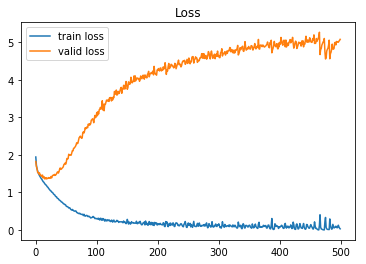

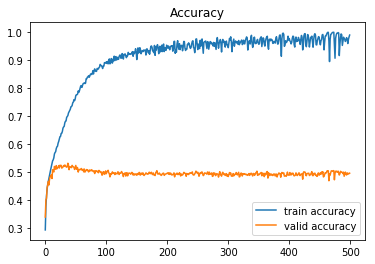

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程
        
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()